In [2]:
import os
import numpy as np
import pandas as pd 
from time import time
import visualizations as vz
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
#Import the datasets 
train = pd.read_csv('incomeTrain.csv')
test = pd.read_csv('incomeTest.csv')
display(train.head(n = 5))
display(test.head(n = 5))


,Unnamed: 0,Age,WorkClass,FinalWeight,Education,EducationNumber,MaritalStatus,Job,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Origin,IncomeLevel
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,Unnamed: 0,Age,WorkClass,FinalWeight,Education,EducationNumber,MaritalStatus,Job,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Origin,IncomeLevel
0,0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [4]:
#Count the number of records in the train and test data
nTrain = train.IncomeLevel.count()
nTrain_greaterThan50k = train[train.IncomeLevel == '>50K'].IncomeLevel.count()
nTrain_maximum50k = train[train.IncomeLevel == '<=50K'].IncomeLevel.count()
#Let's print the results 
print("Total Number of records in the training dataset: {}".format(nTrain))
print("Number of people making more than 50K: {}".format(nTrain_greaterThan50k))
print("Number of people making a maximum of 50K: {}".format(nTrain_maximum50k))
print("Percentage of individuals making more than 50K: {}".format(nTrain_greaterThan50k * 100/nTrain))

Total Number of records in the training dataset: 30162
Number of people making more than 50K: 7508
Number of people making a maximum of 50K: 22654
Percentage of individuals making more than 50K: 24.892248524633644


/Users/computer/Documents/PythonScripts/visualizations.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


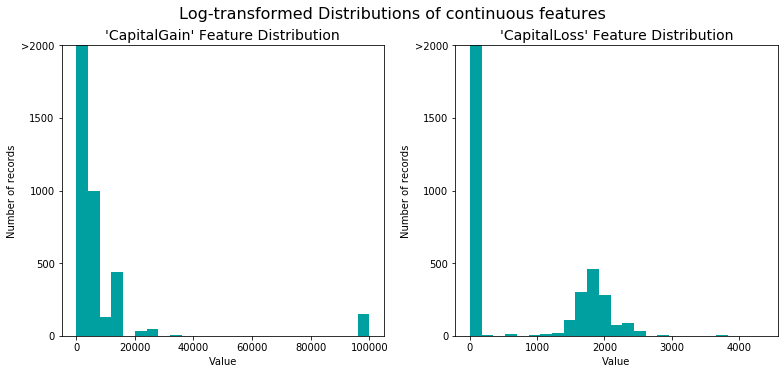

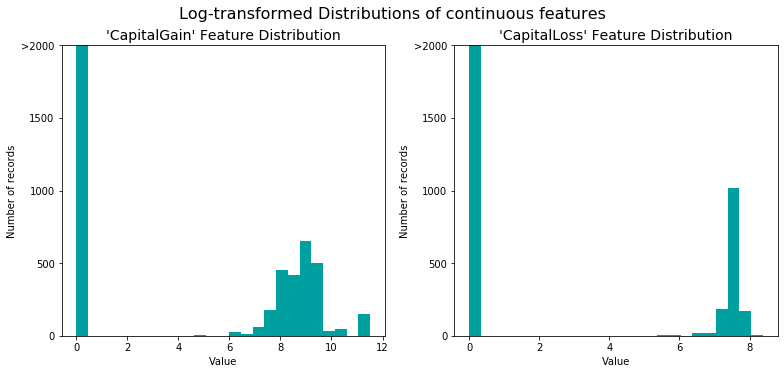

In [5]:
#Preparing the data
#Consider different types of transformations for skewed features, Categorical features and Numerical features. 
#Split into labels and features to build the Data science model 
incomeRaw = train['IncomeLevel']
trainRaw = train.drop(['IncomeLevel'],axis = 1)
vz.distribution(train)

#There are two skewed features here - CapitalLoss and CapitalGain
skewedFeatures = ['CapitalGain','CapitalLoss']
dataLogTransformed = pd.DataFrame(data = trainRaw)
dataLogTransformed[skewedFeatures] = dataLogTransformed[skewedFeatures].apply(lambda x: np.log(x + 1))

#The new log-transformed features 
vz.distribution(dataLogTransformed, transformed = True)

In [6]:
#Normalize the numerical features
scaler = MinMaxScaler()
numericalFeatures = ['Age','FinalWeight' ,'EducationNumber' ,'CapitalGain', 'CapitalLoss', 'HoursPerWeek']
dataLogMinMaxTransformed = pd.DataFrame(data = dataLogTransformed)
dataLogMinMaxTransformed[numericalFeatures] = scaler.fit_transform(dataLogMinMaxTransformed[numericalFeatures])
display(dataLogMinMaxTransformed.head(n = 5))

,Unnamed: 0,Age,WorkClass,FinalWeight,Education,EducationNumber,MaritalStatus,Job,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Origin
0,0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,3,0.493151,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [7]:
#One-hot encoding the Categorical features 
#Since there are many cateogorical features and label encoding leads to multicollinearity we have to one-hot encode
#the features 
dataFinal = pd.get_dummies(dataLogMinMaxTransformed)
dataFinal = dataFinal.drop(['Unnamed: 0'],axis = 1)

def encode(x):
    if x == '>50K':
        return 1
    else:
        return 0
incomeLabel = incomeRaw.apply(encode)
encodedColumns = list(dataFinal.columns)
print("Total Number of features after transformation: {}".format(len(encodedColumns)))
#Delete the unnecessary dataframes
del dataLogMinMaxTransformed,dataLogTransformed,trainRaw

Total Number of features after transformation: 104


In [8]:
#Let's train a few models on this data 
x_train, x_test, y_train, y_test = train_test_split(dataFinal, 
                                                    incomeLabel, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
print("Training set has {} samples".format(x_train.shape[0]))
print("Testing set has {} samples".format(x_test.shape[0]))

Training set has 24129 samples
Testing set has 6033 samples


In [9]:
#Naive predictor
TP = float(np.sum(incomeLabel))
FP = float(incomeRaw.count()-TP)
TN=0.0
FN=0.0
beta = 0.5
accuracy = (TP + TN)/(FP+FN+TP+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
fscore =  (1.0 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.2489, F-score: 0.2929]


GaussianNB trained on 24129 samples.
DecisionTreeClassifier trained on 24129 samples.
RandomForestClassifier trained on 24129 samples.
KNeighborsClassifier trained on 24129 samples.
LinearSVC trained on 24129 samples.


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 24129 samples.
GradientBoostingClassifier trained on 24129 samples.
[0.34944291708869923, 0.6167602140712701, 0.7031131359149582, 0.6383132879292857, 0.6881303335919318, 0.6852051006298971, 0.736618104436078]
[0.0900123119354248, 0.34996700286865234, 2.4502320289611816, 0.4484431743621826, 0.7844419479370117, 0.4880850315093994, 5.773083925247192]
[0.43460964694181997, 0.8092159787833582, 0.8475053870379579, 0.8194927896568871, 0.8403779214321233, 0.8393833913475882, 0.8586109729819327]
['GaussianNB', 'DecisionTree', 'RandomForest', 'KNeighbors', 'LinearSVC', 'LogisticRegression', 'GradientBoosting']


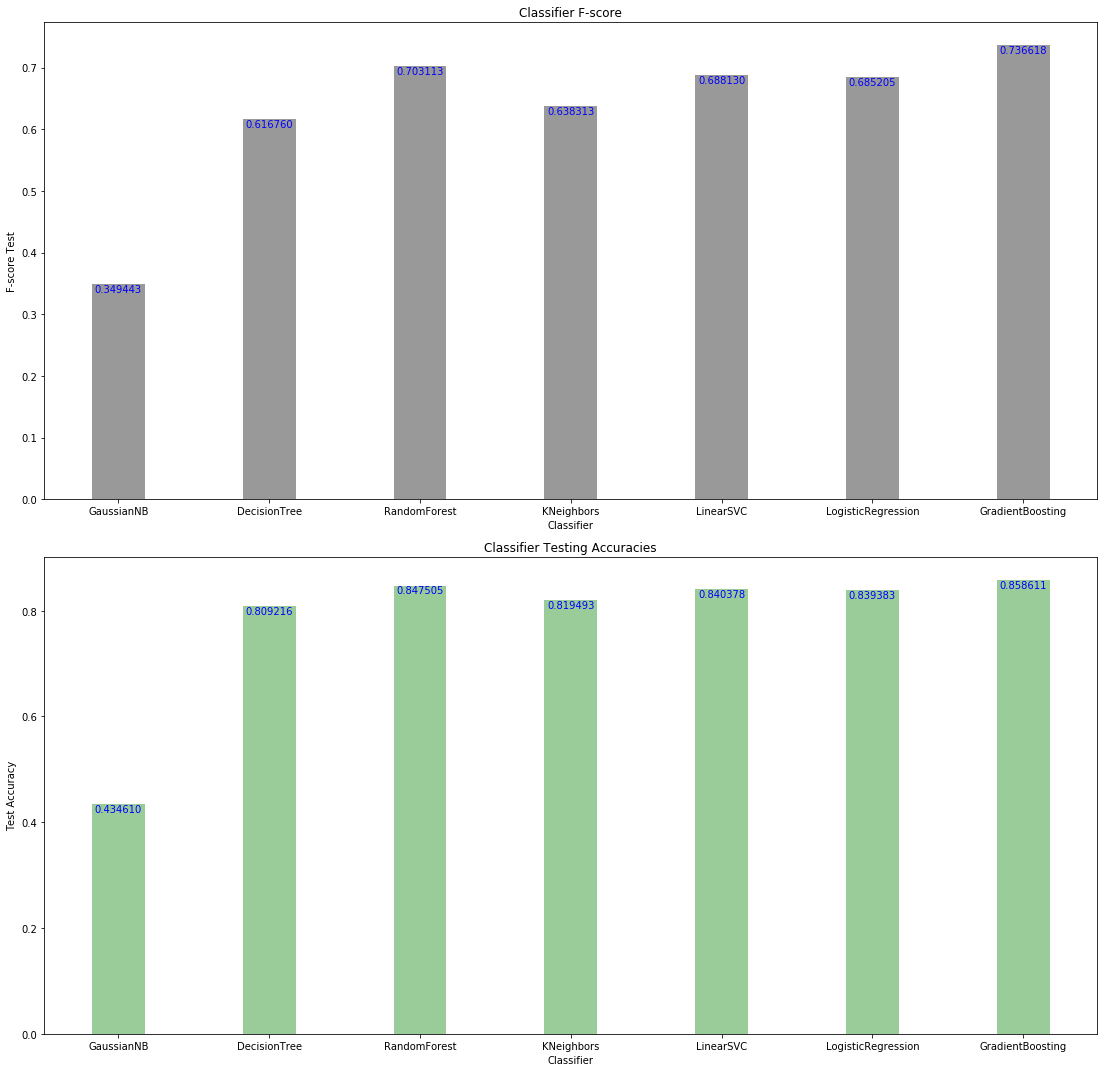

In [10]:
#Choose a few models 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score,accuracy_score

gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=42, n_jobs=2)
knn = KNeighborsClassifier(n_jobs=2)
lreg = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
gdb = GradientBoostingClassifier(random_state=42)
classifiersList = [gnb,dt,rfc,knn,lsvc,lreg,gdb]
classifiersScores = []
classifiersTrainTimes = []

def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_train[:300],learner.predict(x_train[:300]))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(y_train),x_train,y_train,x_test,y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

#Plot the results using the metrics obtained 
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()

In [11]:
#Model Tuning
#Let's select a model and change the parameters and this can be done for different models 
#I'll choose the RandomForestClassifier and change its parameters to reflect the change in Accuracy and other things
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state=42, n_jobs=2)
parameters = {'max_depth': [4,6,8,10,12], 'n_estimators': [100, 150, 200]}
scorer = make_scorer(fbeta_score,beta=0.5)

grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

#Fit the grid object using fit(), training data and the optimal parameters
grid_fit = grid_obj.fit(x_train,y_train)

#Get the estimator 
best_clf = grid_fit.best_estimator_

#Predictions using both the unoptimized and the optimized model 
predsUnoptimized = (clf.fit(x_train, y_train)).predict(x_test)
predsOptimized = best_clf.predict(x_test)

#Best fit parameters
print("Best gridsearch parameters\n------")
print(grid_fit.best_params_)

#Report the change in accuracies 
print("Unoptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsUnoptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsUnoptimized, beta = 0.5)))
print("\nOptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsOptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsOptimized, beta = 0.5)))

Best gridsearch parameters
------
{'max_depth': 12, 'n_estimators': 200}
Unoptimized model characteristics
-----
Accuracy score on testing data: 84.7505
F-score on testing data: 0.7031

Optimized model characteristics
-----
Accuracy score on testing data: 85.1649
F-score on testing data: 0.7263


Let us look at which feature exerts a lot of pressure on the predictions and the labels

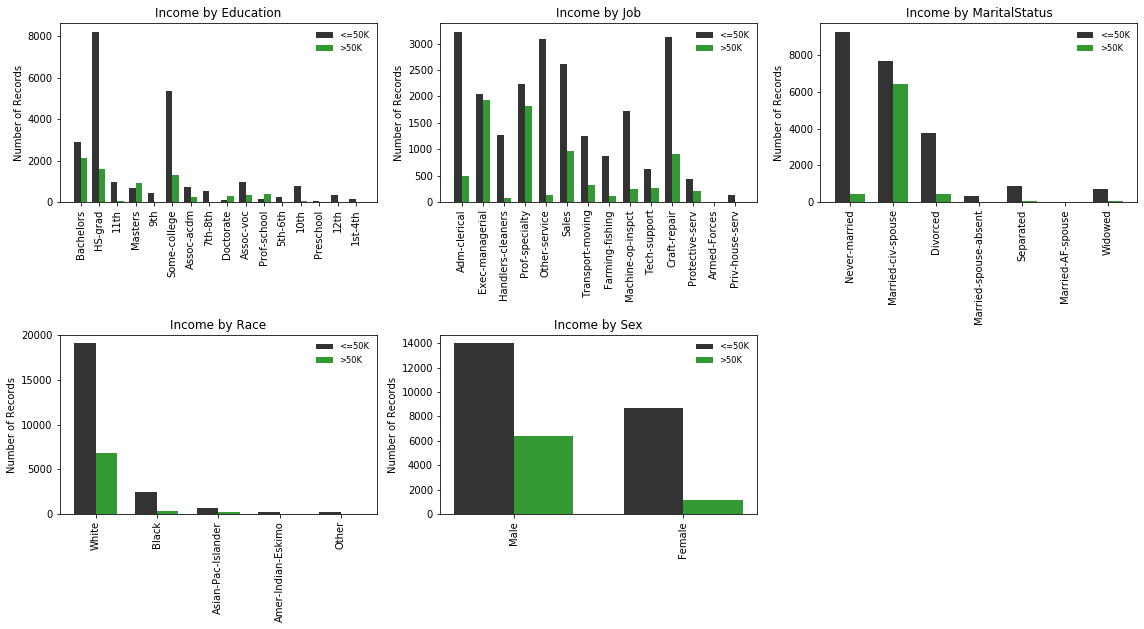

In [20]:
subFeatures = ['Education' ,'Job', 'MaritalStatus', 'Race', 'Sex']
plt.figure(1,figsize = (16,16))
plot_num = 1
nrows = 4
ncols = 3
for feat in subFeatures:
    groups = train[feat].unique()
    geLems = len(groups)
    lessThan50 = [0]*geLems
    moreThan50 = [0]*geLems
    for ocn in range(len(groups)):
        for row in range(len(train)):
            if train[feat][row].strip() == groups[ocn].strip() and incomeRaw[row].strip() == '>50K':
                moreThan50[ocn] += 1
            elif train[feat][row].strip() == groups[ocn].strip() and incomeRaw[row].strip() == '<=50K':
                lessThan50[ocn] += 1
    # create subplots for 'Education',FinalWeight ,'Job', 'MaritalStatus', 'Race', 'Sex'
    plt.subplot(nrows, ncols, plot_num)
    index = np.arange(geLems)
    barWidth = 0.35
    opacity = 0.8
    rects1 = plt.bar(index, lessThan50, barWidth, alpha=opacity, color='k', label='<=50K')
    rects2 = plt.bar(index + barWidth, moreThan50, barWidth, alpha=opacity, color='g', label='>50K')
    plt.ylabel("Number of Records")
    plt.title("Income by {}".format(feat))
    plt.xticks(index + barWidth / 2.0, groups, rotation='vertical')
    plt.legend(frameon=False, loc='upper right', fontsize='small')
    plot_num += 1
plt.tight_layout()
plt.show()
    

Scikit can help extract feature importance for an algorithm

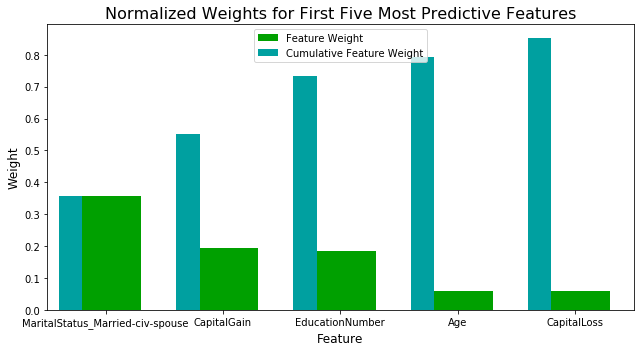

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200,random_state=10,max_depth=4)
model.fit(x_train,y_train)
importances = model.feature_importances_
vz.featurePlot(importances, x_train, y_train)